<a href="https://colab.research.google.com/github/heena2248/Udemy_ML/blob/main/dim_reduction_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dimensionality reduction

- Factor analysis
- PCA
- LDA
- tSNE
- UMAP
-ICA
- Auto encoders

Feature Selection

- Low Variance Filter
- High Correlation Filter
- RFE
- SelectKBest (Chi-Square, ANOVA)
- Lasso
- DT/RF
- Stepwise regression

 - Forward Selection
 - Backward Selection
 - Bi-directional Elimination


Factor Analysis

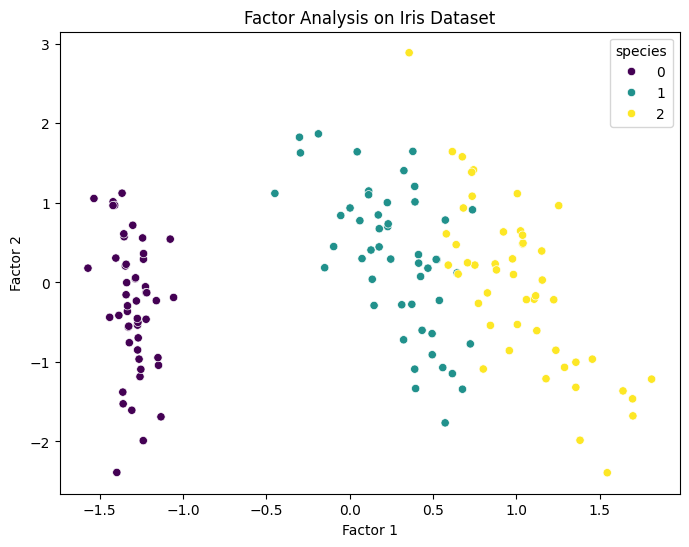

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=0)

# Fit the model and transform the data
X_fa = fa.fit_transform(X)

# Convert to a DataFrame for easy visualization
df_fa = pd.DataFrame(X_fa, columns=['Factor 1', 'Factor 2'])
df_fa['species'] = y

# Plot the factor analysis results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_fa, x='Factor 1', y='Factor 2', hue='species', palette='viridis')
plt.title('Factor Analysis on Iris Dataset')
plt.show()

PCA

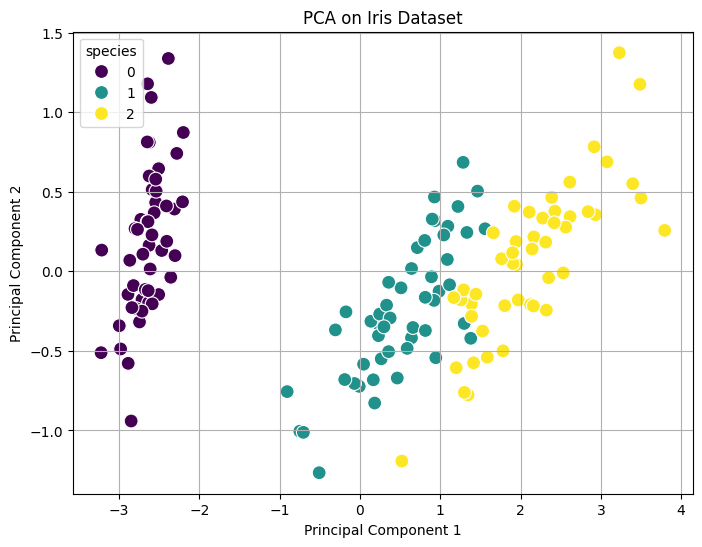

Explained Variance Ratio: [0.92461872 0.05306648]


In [ ]:
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA(n_components=2)

# Fit the model and transform the data
X_pca = pca.fit_transform(X)

# Convert to a DataFrame for easy visualization
df_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['species'] = y

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='species', palette='viridis', s=100)
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

LDA

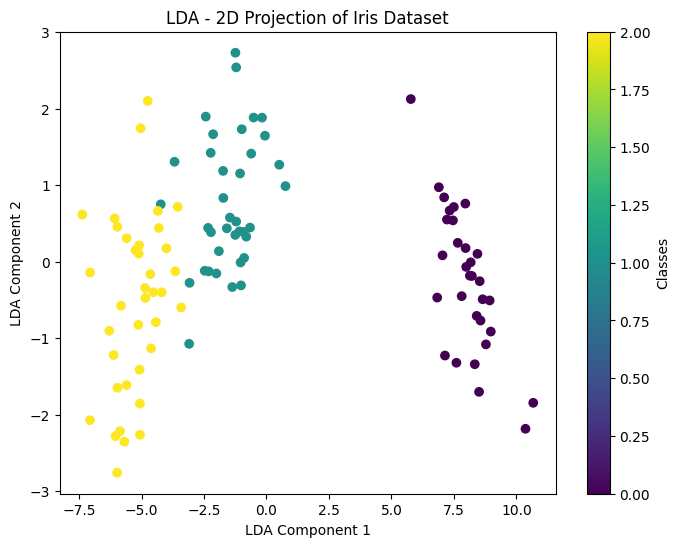

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load the dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Apply Linear Discriminant Analysis (LDA) for dimensionality reduction
lda = LDA(n_components=2)  # We are reducing the data to 2 dimensions
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 4: Plot the reduced dimensionality data (optional visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis')
plt.title('LDA - 2D Projection of Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Classes')
plt.show()

**tSNE** - t-distributed Stochastic Neighbor Embedding

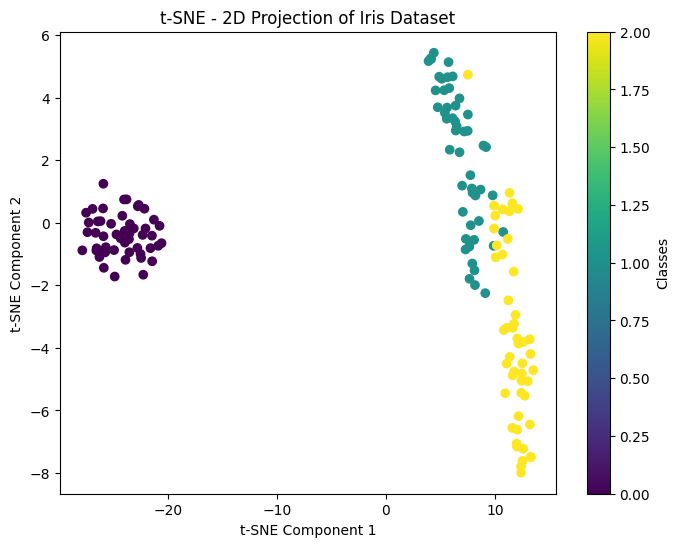

In [ ]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Load the dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable (class labels)

# Step 2: Apply t-SNE for dimensionality reduction
# Set the number of components to 2 for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 3: Plot the reduced dimensionality data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE - 2D Projection of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Classes')
plt.show()

UMAP

In [ ]:
!pip install umap-learn

['Collecting umap-learn',
 '  Downloading umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)',
 'Requirement already satisfied: numpy>=1.17 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (1.26.4)',
 'Requirement already satisfied: scipy>=1.3.1 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (1.13.1)',
 'Requirement already satisfied: scikit-learn>=0.22 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (1.5.2)',
 'Requirement already satisfied: numba>=0.51.2 in /usr/local/lib/python3.10/dist-packages (from umap-learn) (0.60.0)',
 'Collecting pynndescent>=0.5 (from umap-learn)',
 '  Downloading pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from umap-learn) (4.66.5)',
 'Requirement already satisfied: llvmlite<0.44,>=0.43.0dev0 in /usr/local/lib/python3.10/dist-packages (from numba>=0.51.2->umap-learn) (0.43.0)',
 'Requirement already satisfied: joblib>=0.11 in 

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


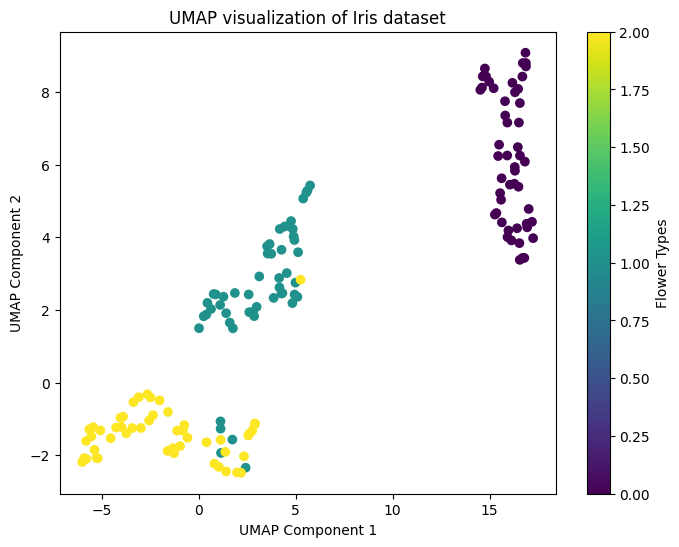

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import umap

# Load the Iris dataset
iris = load_iris()
X = iris.data        # Features: sepal length, sepal width, petal length, petal width
y = iris.target      # Target: 0 = Setosa, 1 = Versicolor, 2 = Virginica

# Initialize and fit UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=0)
X_umap = umap_model.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Flower Types')
plt.title('UMAP visualization of Iris dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

ICA

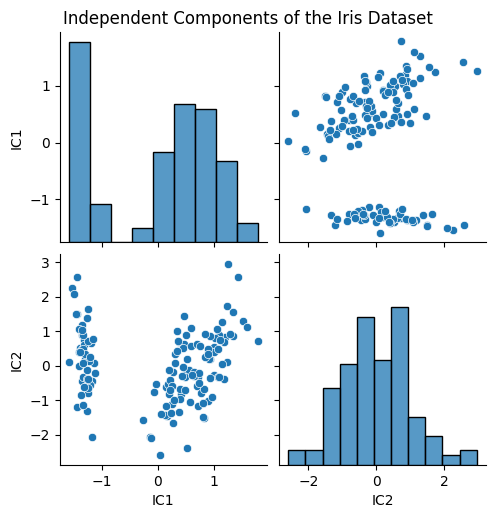

                IC1           IC2
count  1.500000e+02  1.500000e+02
mean  -1.278977e-15 -1.936229e-15
std    1.003350e+00  1.003350e+00
min   -1.589481e+00 -2.590152e+00
25%   -1.260500e+00 -6.598876e-01
50%    3.300420e-01 -1.716210e-02
75%    8.214999e-01  6.976115e-01
max    1.783971e+00  2.953915e+00


In [ ]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()
X = iris.data  # We use the feature data only (independent variables)

# Apply ICA
n_components = 2  # You can adjust this based on the number of independent components you want
ica = FastICA(n_components=n_components, random_state=42)
X_ica = ica.fit_transform(X)

# Convert the result into a DataFrame for easy handling
X_ica_df = pd.DataFrame(X_ica, columns=[f'IC{i+1}' for i in range(n_components)])

# Visualizing the independent components
sns.pairplot(X_ica_df)
plt.suptitle('Independent Components of the Iris Dataset', y=1.02)
plt.show()

# Check variance captured by each independent component
print(X_ica_df.describe())

Auto encoder

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


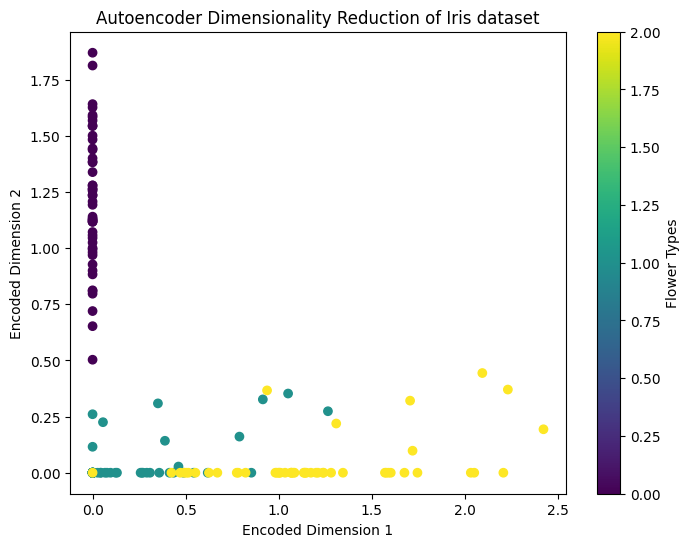

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the autoencoder architecture
input_dim = X_scaled.shape[1]  # Input dimension (4 for Iris dataset)
encoding_dim = 2  # Desired output dimension

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=5, batch_size=16, shuffle=True, verbose=0)

# Extract the encoder part for dimensionality reduction
encoder = Model(inputs=input_layer, outputs=encoded)

# Reduce the data to 2 dimensions
X_encoded = encoder.predict(X_scaled)

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Flower Types')
plt.title('Autoencoder Dimensionality Reduction of Iris dataset')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.show()

Feature Selection

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.api as sm

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Apply Low Variance Filter
threshold = 0.7  # Custom threshold; can be adjusted based on the dataset
var_thresh = VarianceThreshold(threshold)
X_low_variance = var_thresh.fit_transform(X_train)

print("Features after Low Variance Filter:", X_low_variance.shape[1])

Features after Low Variance Filter: 1


In [5]:
# Correlation matrix
corr_matrix = X_train.corr().abs()
print(corr_matrix)
# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Features with correlation higher than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
X_high_corr_filtered = X_train.drop(columns=to_drop)

print("Features after High Correlation Filter:", X_high_corr_filtered.shape[1])

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.032857           0.866831   
sepal width (cm)            0.032857          1.000000           0.338702   
petal length (cm)           0.866831          0.338702           1.000000   
petal width (cm)            0.798459          0.268221           0.957872   

                   petal width (cm)  
sepal length (cm)          0.798459  
sepal width (cm)           0.268221  
petal length (cm)          0.957872  
petal width (cm)           1.000000  
Features after High Correlation Filter: 3


In [10]:
# Apply RFE with Logistic Regression
model = LogisticRegression(max_iter=200)
rfe = RFE(model, n_features_to_select=2)  # Choosing 2 features for demonstration
X_rfe = rfe.fit_transform(X_train, y_train)

print("Features after RFE:", X_rfe.shape[1])
# Print the feature mask
print("Selected Features Mask:", rfe.support_)

# Print the index of the selected features
selected_features = [i for i, x in enumerate(rfe.support_) if x]
print("Indices of Selected Features:", selected_features)

# Alternatively, if you have feature names
feature_names = X_train.columns  # if X_train is a DataFrame
selected_feature_names = feature_names[rfe.support_]
print("Selected Feature Names:", selected_feature_names)

Features after RFE: 2
Selected Features Mask: [False False  True  True]
Indices of Selected Features: [2, 3]
Selected Feature Names: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
# Apply SelectKBest with ANOVA F-test
k_best = SelectKBest(score_func=f_classif, k=2)
X_anova = k_best.fit_transform(X_train, y_train)

print("Features after SelectKBest (ANOVA):", X_anova.shape[1])

Features after SelectKBest (ANOVA): 2


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Chi-Square requires non-negative data, scaling for demonstration
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply SelectKBest with Chi-Square
k_best_chi2 = SelectKBest(score_func=chi2, k=2)
X_chi2 = k_best_chi2.fit_transform(X_scaled, y_train)

print("Features after SelectKBest (Chi-Square):", X_chi2.shape[1])

Features after SelectKBest (Chi-Square): 2


In [ ]:
# Apply Lasso
lasso = LassoCV(cv=5).fit(X_train, y_train)
lasso_coef = lasso.coef_

# Select non-zero coefficients
X_lasso_selected = X_train.loc[:, lasso_coef != 0]

print("Features after Lasso:", X_lasso_selected.shape[1])

Features after Lasso: 4


In [ ]:
# Apply Decision Tree Classifier for feature importance
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Get feature importances
importance = tree.feature_importances_
X_tree_selected = X_train.loc[:, importance > 0.1]

print("Features after Decision Tree Classifier:", X_tree_selected.shape[1])

# Apply Random Forest Classifier for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importance_rf = rf.feature_importances_
X_rf_selected = X_train.loc[:, importance_rf > 0.1]

print("Features after Random Forest Classifier:", X_rf_selected.shape[1])

Features after Decision Tree Classifier: 1
Features after Random Forest Classifier: 3


In [ ]:
def forward_selection(X, y):
    initial_list = []
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < 0.05:  # Adjust p-value threshold if necessary
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
        if not changed:
            break
    return included

X_forward_selected = X_train[forward_selection(X_train, y_train)]
print("Features after Forward Selection:", X_forward_selected.shape[1])

Features after Forward Selection: 3


In [ ]:
def backward_selection(X, y):
    included = list(X.columns)
    while True:
        model = sm.OLS(y, add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > 0.05:  # Adjust p-value threshold if necessary
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        else:
            break
    return included

X_backward_selected = X_train[backward_selection(X_train, y_train)]
print("Features after Backward Selection:", X_backward_selected.shape[1])

Features after Backward Selection: 3


In [ ]:
def bi_directional_elimination(X, y):
    included = forward_selection(X, y)
    while True:
        model = sm.OLS(y, add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > 0.05:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        else:
            break
    return included

X_bidirectional_selected = X_train[bi_directional_elimination(X_train, y_train)]
print("Features after Bi-directional Elimination:", X_bidirectional_selected.shape[1])

Features after Bi-directional Elimination: 3


P-value

In [ ]:
import statsmodels.api as sm
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Adding a constant for intercept
X = sm.add_constant(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting a linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Display summary with p-values
print(results.summary())

# Identify significant features with p-value < 0.05
significant_features = results.pvalues[results.pvalues < 0.05].index
X_train_significant = X_train[significant_features]

print("Selected significant features based on p-values:", significant_features)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     294.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.29e-54
Time:                        10:42:09   Log-Likelihood:                 7.8170
No. Observations:                 105   AIC:                            -5.634
Df Residuals:                     100   BIC:                             7.636
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1808      0.24

VIF

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add a constant column for intercept
X = sm.add_constant(X)

# Function to calculate VIF for each feature
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Iteratively remove features with high VIF (>5), but ensure at least two features remain
while X.shape[1] > 2:  # Keep at least two features
    vif = calculate_vif(X)
    print("VIF:")
    print(vif)
    # Find the feature with the highest VIF
    max_vif = vif[vif["VIF"] > 6]
    if max_vif.empty:
        break
    # Remove the feature with the highest VIF
    feature_to_remove = max_vif.iloc[0]["Feature"]
    X = X.drop(columns=[feature_to_remove])
    print(f"Removed feature '{feature_to_remove}' with high VIF")

# Calculate VIF after dimensionality reduction
vif_after = calculate_vif(X)
print("VIF after feature selection:")
print(vif_after)

VIF:
             Feature         VIF
0              const  131.113086
1  sepal length (cm)    7.072722
2   sepal width (cm)    2.100872
3  petal length (cm)   31.261498
4   petal width (cm)   16.090175
Removed feature 'const' with high VIF
VIF:
             Feature         VIF
0  sepal length (cm)  262.969348
1   sepal width (cm)   96.353292
2  petal length (cm)  172.960962
3   petal width (cm)   55.502060
Removed feature 'sepal length (cm)' with high VIF
VIF:
             Feature        VIF
0   sepal width (cm)   5.856965
1  petal length (cm)  62.071308
2   petal width (cm)  43.292574
Removed feature 'petal length (cm)' with high VIF
VIF after feature selection:
            Feature       VIF
0  sepal width (cm)  2.891774
1  petal width (cm)  2.891774
